In [1]:
#Import important libraries

import pandas as pd
import numpy as np
import json
import re
import pandas as pd
from mplsoccer import Pitch, VerticalPitch
from adjustText import adjust_text
from highlight_text import ax_text
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df_shots = pd.read_excel("shots.xlsx")
print(df_shots.shape)

(31736, 77)


In [2]:
a = ['Unnamed: 0', 'Unnamed: 0.1']
df_shots = df_shots.drop(a, axis = 1)

Check types of shots taken from which kind of play!

In [3]:
df_shots['shot_type_name'].value_counts()

Open Play    29529
Free Kick     1693
Penalty        505
Corner           8
Kick Off         1
Name: shot_type_name, dtype: int64

In [4]:
df_openplay = df_shots.loc[df_shots['shot_type_name'] == 'Open Play']
df_freekick = df_shots.loc[df_shots['shot_type_name'] == 'Free Kick']
df_penalty = df_shots.loc[df_shots['shot_type_name'] == 'Penalty']
df_corner = df_shots.loc[df_shots['shot_type_name'] == 'Corner']
df_kickoff = df_shots.loc[df_shots['shot_type_name'] == 'Kick Off']

print(df_openplay.shape)
print(df_freekick.shape)
print(df_penalty.shape)
print(df_corner.shape)
print(df_kickoff.shape)

(29529, 75)
(1693, 75)
(505, 75)
(8, 75)
(1, 75)


Select open-play shots only!

In [5]:
df = df_openplay.copy()

In [6]:
df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'possession_team_name', 'player_id', 'player_name', 'duration',
       'under_pressure', 'play_pattern_name', 'shot_freeze_frame',
       'shot_type_name', 'shot_technique_name', 'shot_outcome_name',
       'shot_body_part_name', 'shot_statsbomb_xg', 'previous_type_name',
       'previous_pass_height_name', 'location_x', 'location_y',
       'shot_end_location_x', 'shot_end_location_y', 'match_id',
       'home_team_home_team_name', 'away_team_away_team_name', 'home_away',
       'pack_density', 'league_trophy', 'location0', 'location1', 'location2',
       'location3', 'location4', 'location5', 'location6', 'location7',
       'location8', 'location9', 'location10', 'location11', 'location12',
       'location13', 'location14', 'location15', 'location16', 'location17',
       'location18', 'location19', 'location', 'inside0', 'inside1', 'inside2',
       'inside3', 'inside4', 'inside5', 'inside6', 'i

In [7]:
unnescessary_columns = ['id', 'location0', 'location1', 'location2',
       'location3', 'location4', 'location5', 'location6', 'location7',
       'location8', 'location9', 'location10', 'location11', 'location12',
       'location13', 'location14', 'location15', 'location16', 'location17',
       'location18', 'location19', 'location', 'inside0', 'inside1', 'inside2',
       'inside3', 'inside4', 'inside5', 'inside6', 'inside7', 'inside8',
       'inside9', 'inside10', 'inside11', 'inside12', 'inside13', 'inside14',
       'inside15', 'inside16', 'inside17', 'inside18', 'inside19']

df = df.drop(unnescessary_columns, axis = 1)
df.head()

,index,period,timestamp,minute,second,possession,possession_team_name,player_id,player_name,duration,...,shot_end_location_y,match_id,home_team_home_team_name,away_team_away_team_name,home_away,pack_density,league_trophy,gk_pos_x,gk_pos_y,gk_distance
0,277,1,2022-11-23 00:04:49.357,4,49,12,Australia Women's,4961,Samantha May Kerr,0.909600,...,43.2,68311,Jamaica Women's,Australia Women's,Away,1,WWCUP,116.0,43.0,12.73
1,484,1,2022-11-23 00:10:14.178,10,14,25,Australia Women's,4961,Samantha May Kerr,1.033500,...,37.3,68311,Jamaica Women's,Australia Women's,Away,1,WWCUP,118.3,39.9,11.18
2,839,1,2022-11-23 00:18:12.068,18,12,38,Australia Women's,4961,Samantha May Kerr,1.391602,...,32.9,68311,Jamaica Women's,Australia Women's,Away,1,WWCUP,118.9,42.8,11.67
3,1151,1,2022-11-23 00:24:52.927,24,52,48,Australia Women's,4961,Samantha May Kerr,1.154700,...,40.9,68311,Jamaica Women's,Australia Women's,Away,1,WWCUP,118.9,42.1,13.00
4,1156,1,2022-11-23 00:25:27.514,25,27,49,Australia Women's,4961,Samantha May Kerr,0.907511,...,46.1,68311,Jamaica Women's,Australia Women's,Away,4,WWCUP,119.3,40.7,7.24


In [8]:
df.columns

Index(['index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'possession_team_name', 'player_id', 'player_name', 'duration',
       'under_pressure', 'play_pattern_name', 'shot_freeze_frame',
       'shot_type_name', 'shot_technique_name', 'shot_outcome_name',
       'shot_body_part_name', 'shot_statsbomb_xg', 'previous_type_name',
       'previous_pass_height_name', 'location_x', 'location_y',
       'shot_end_location_x', 'shot_end_location_y', 'match_id',
       'home_team_home_team_name', 'away_team_away_team_name', 'home_away',
       'pack_density', 'league_trophy', 'gk_pos_x', 'gk_pos_y', 'gk_distance'],
      dtype='object')

Calculate shot distance and shot angle!

In [9]:
#Calculate shot distance
df['shot_distance']=round(np.sqrt((df['shot_end_location_x']-df['location_x'])**2+(df['shot_end_location_y']-df['location_y'])**2),1)
df['shot_a'] = np.sqrt((df['location_x']-120)**2+(df['location_y']-36)**2)
df['shot_b']=np.sqrt((df['location_x']-120)**2+(df['location_y']-44)**2)

df['shot_a'] = df['shot_a'].round(2)
df['shot_b'] = df['shot_b'].round(2)

#Calculate shot angle
df['shot_angle']=np.arccos((df['shot_a']**2+df['shot_b']**2-64)/(2*df['shot_a']*df['shot_b']))#calculating angle using cosine rule
df['shot_angle']=np.degrees(df['shot_angle'])
df['shot_angle']=round(df['shot_angle'],2)

/Users/aritramajumdar/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
df.columns

Index(['index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'possession_team_name', 'player_id', 'player_name', 'duration',
       'under_pressure', 'play_pattern_name', 'shot_freeze_frame',
       'shot_type_name', 'shot_technique_name', 'shot_outcome_name',
       'shot_body_part_name', 'shot_statsbomb_xg', 'previous_type_name',
       'previous_pass_height_name', 'location_x', 'location_y',
       'shot_end_location_x', 'shot_end_location_y', 'match_id',
       'home_team_home_team_name', 'away_team_away_team_name', 'home_away',
       'pack_density', 'league_trophy', 'gk_pos_x', 'gk_pos_y', 'gk_distance',
       'shot_distance', 'shot_a', 'shot_b', 'shot_angle'],
      dtype='object')

In [11]:
df['play_pattern_name'].unique()

array(['Regular Play', 'From Free Kick', 'From Throw In', 'From Corner',
       'From Kick Off', 'From Goal Kick', 'From Counter', 'From Keeper',
       'Other'], dtype=object)

In [12]:
df['shot_type_name'].unique()

array(['Open Play'], dtype=object)

In [13]:
df['shot_technique_name'].unique()

array(['Normal', 'Half Volley', 'Volley', 'Lob', 'Diving Header',
       'Backheel', 'Overhead Kick'], dtype=object)

In [14]:
df['shot_body_part_name'].unique()

array(['Right Foot', 'Head', 'Left Foot', 'Other'], dtype=object)

In [15]:
df['previous_type_name'].unique()

array(['Ball Receipt*', 'Duel', 'Carry', 'Pressure', 'Ball Recovery',
       'Block', 'Goal Keeper', 'Clearance', 'Dribble', 'Error',
       'Interception', 'Foul Won', 'Camera On', 'Shot', 'Foul Committed',
       'Miscontrol', 'Tactical Shift'], dtype=object)

In [16]:
df['previous_pass_height_name'].unique()

array(['Ground Pass', 'High Pass', 'Low Pass'], dtype=object)

Checking the number of goals! (Also the output or target column!)

In [17]:
df['shot_outcome'] = np.where((df['shot_outcome_name'] == 'Goal'), 
                                         'goal', 'No_goal')

In [18]:
df['shot_outcome'].value_counts()

No_goal    26152
goal        3377
Name: shot_outcome, dtype: int64

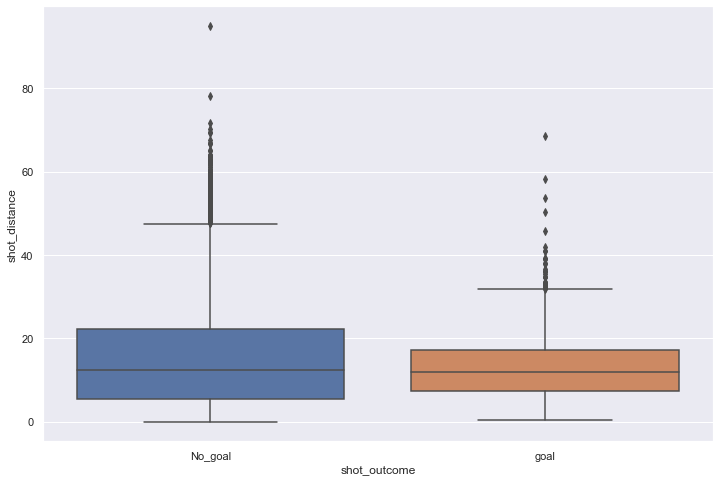

In [19]:
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(data=df, x="shot_outcome", y="shot_distance")
#plt.savefig('/Users/aritramajumdar/Desktop/Website/xG_model/a.png', dpi = 300)

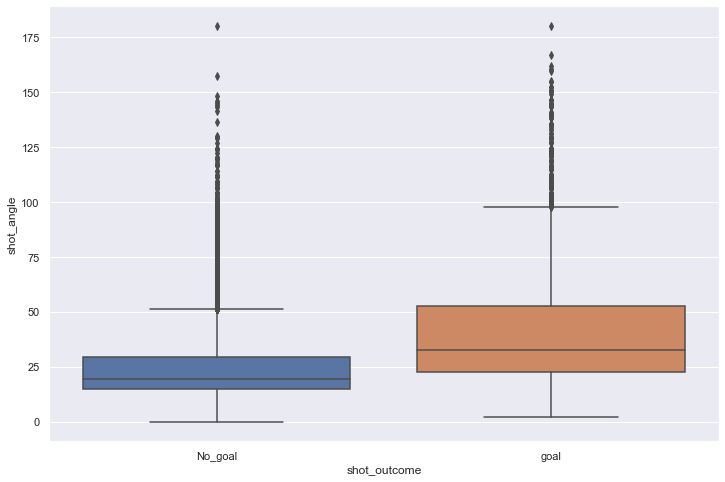

In [20]:
sns.boxplot(data=df, x="shot_outcome", y="shot_angle")
#plt.savefig('/Users/aritramajumdar/Desktop/Website/xG_model/b.png', dpi = 300)

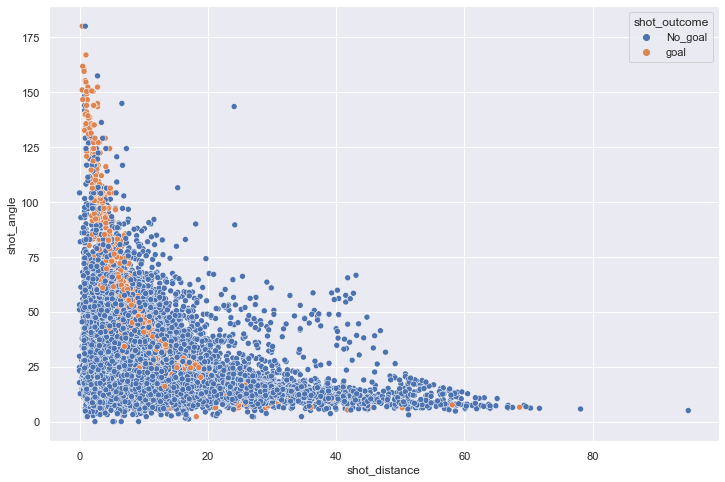

In [21]:
sns.scatterplot(x = 'shot_distance', y = 'shot_angle', data = df, hue = 'shot_outcome')
#plt.savefig('/Users/aritramajumdar/Desktop/Website/xG_model/c.png', dpi = 300)

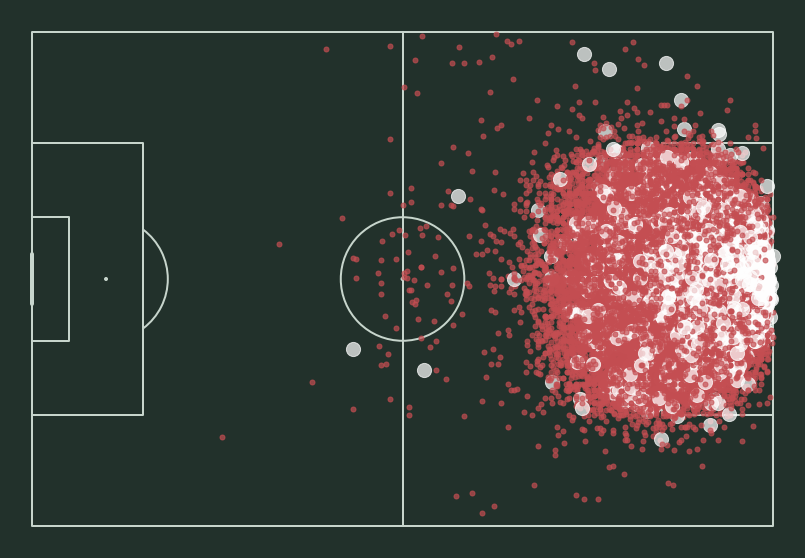

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

from mplsoccer.pitch import Pitch
from mplsoccer.pitch import VerticalPitch

fig, ax = plt.subplots(figsize=(20, 10))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

"""
#The statsbomb pitch from mplsoccer
pitch = VerticalPitch(pitch_type='statsbomb',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True, half = True)
"""
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc', 
              figsize=(16, 11), constrained_layout=True, tight_layout=False)


pitch.draw(ax = ax)
plt.gca().invert_yaxis()

for x in range(len(df['location_x'])):
    if df['shot_outcome'].iloc[x] == 'goal':
        plt.scatter(df['location_x'].iloc[x], df['location_y'].iloc[x], c = 'w', s=200, alpha = 0.7)
    else:
        plt.scatter(df['location_x'].iloc[x], df['location_y'].iloc[x], c = 'r', s=25, alpha = 0.7)
        
#plt.savefig('/Users/aritramajumdar/Desktop/Website/xG_model/d.png', dpi = 300)

In [23]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['play_pattern_name'] = labelencoder.fit_transform(df['play_pattern_name'])
df['shot_type_name'] = labelencoder.fit_transform(df['shot_type_name'])
df['shot_technique_name'] = labelencoder.fit_transform(df['shot_technique_name'])
df['shot_body_part_name'] = labelencoder.fit_transform(df['shot_body_part_name'])
df['previous_type_name'] = labelencoder.fit_transform(df['previous_type_name'])
df['previous_pass_height_name'] = labelencoder.fit_transform(df['previous_pass_height_name'])
df['home_away'] = labelencoder.fit_transform(df['home_away'])


v = ['shot_outcome_name']
df = df.drop(v, axis = 1)

print(df['shot_outcome'].value_counts())

df['shot_outcome'] = labelencoder.fit_transform(df['shot_outcome'])
df['shot_angle'] = df['shot_angle'].fillna(0)
print(df['shot_outcome'].value_counts())

No_goal    26152
goal        3377
Name: shot_outcome, dtype: int64
0    26152
1     3377
Name: shot_outcome, dtype: int64


In [24]:
variables = ['play_pattern_name', 'shot_technique_name',
        'shot_body_part_name', 'previous_type_name',
       'previous_pass_height_name', 'location_x', 'location_y',
        'home_away', 'shot_distance', 'shot_a', 'shot_b',
       'shot_angle', 'shot_statsbomb_xg', 'gk_distance', 'pack_density']

target = 'shot_outcome'

X = df[variables]
y = df[target]


print(X.shape)
print(y.shape)

(29529, 15)
(29529,)


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier




from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, 
                                                    stratify = y)
g = ['shot_statsbomb_xg']

X_train = X_train.drop(g, axis = 1)

z = X_test[['shot_statsbomb_xg']]

X_test = X_test.drop(g, axis = 1)


sm = SMOTE(random_state=42)

X_resampled, Y_resampled = sm.fit_resample(X_train, y_train)





/Users/aritramajumdar/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [27]:
lgb = LGBMClassifier()
lgb.fit(X_resampled, Y_resampled)
y_pred = lgb.predict(X_test.values)
accuracy_score(y_test, y_pred)

0.9061970877074161

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2615
           1       0.61      0.51      0.55       338

    accuracy                           0.91      2953
   macro avg       0.77      0.73      0.75      2953
weighted avg       0.90      0.91      0.90      2953



In [29]:
print(confusion_matrix(y_test, y_pred))

[[2504  111]
 [ 166  172]]


Permutation feature importance!

In [30]:
import eli5


variables = ['play_pattern_name', 'shot_technique_name',
        'shot_body_part_name', 'previous_type_name',
       'previous_pass_height_name', 'location_x', 'location_y',
        'home_away', 'shot_distance', 'shot_a', 'shot_b',
       'shot_angle', 'gk_distance', 'pack_density']

eli5.show_weights(lgb, feature_names=variables)

/Users/aritramajumdar/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/aritramajumdar/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.2741,pack_density
0.1458,shot_distance
0.1372,shot_angle
0.1064,home_away
0.0819,shot_body_part_name
0.0590,previous_pass_height_name
0.0416,shot_b
0.0408,play_pattern_name
0.0372,shot_technique_name
0.0286,shot_a


In [31]:
y_test = pd.DataFrame(y_test)
y_pred_proba = lgb.predict_proba(X_test.values)
df_test_final = pd.concat([X_test, z, y_test], axis = 1)
df_test_final = df_test_final.reset_index()
t = pd.DataFrame(y_pred_proba, columns = ['nxG', 'xG'])
shots_test = pd.concat([df_test_final, t], axis = 1)
shots_test['shot_statsbomb_xg'] = shots_test['shot_statsbomb_xg'].round(2)
compare_xg = shots_test[['shot_statsbomb_xg', 'xG', 'shot_outcome']]
cor_df = compare_xg.corr()

In [32]:
cor_df

,shot_statsbomb_xg,xG,shot_outcome
shot_statsbomb_xg,1.000000,0.682616,0.457977
xG,0.682616,1.000000,0.580950
shot_outcome,0.457977,0.580950,1.000000


Shapley feature importance!

In [34]:
import shap
explainer = shap.TreeExplainer(lgb)
shap_values = explainer.shap_values(X_test)

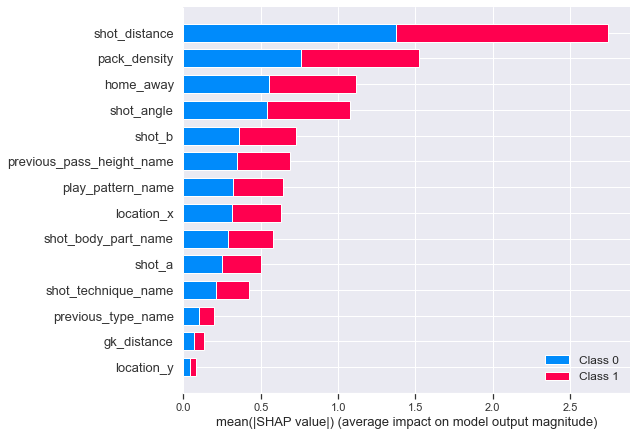

In [37]:
shap.summary_plot(shap_values, X_test)